# 2.8 Random Forests by Station

## 1. Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

2024-12-13 12:09:06.772960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#Create a path to where your data is stored.
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/11-2024 ClimateWins Analysis/02 Data'

In [47]:
dfc = pd.read_csv(os.path.join(path, 'wrangled_full.csv'))

In [48]:
dfp = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

## 2. Dusseldorf

### 2.1 Subsetting

In [51]:
## Create Subset for DUSSELDORF
dfcDUS = dfc.loc[:, dfc.columns.str.contains('DUSSELDORF', case=False)]
dfcDUS.head()

DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   
1                       8                 0.89               1.0161   
2                       7                 0.95               1.0161   
3                       8                 0.86               1.0161   
4                       7                 0.92               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   
1                         0.18                      0.66                  0.5   
2                         0.12                      0.07                  0.0   
3                         0.12                      0.02                  0.0   
4                         0.12                      0.62                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  
0                  10.0                  7.0                 11.5  
1                   8.2                  7.4                 11.0  
2                   7.1                  6.9                  9.1  
3                   6.8                  3.6                  8.0  
4                   7.7                  6.2                 11.0

In [52]:
dfpDUS = dfp.loc[:, dfp.columns.str.contains('DUSSELDORF', case=False)]
dfpDUS.head()

DUSSELDORF_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0

In [53]:
dfcDUS.shape

(22950, 9)

In [54]:
dfpDUS.shape

(22950, 1)

In [126]:
X = dfcDUS
y = dfpDUS.DUSSELDORF_pleasant_weather

In [128]:
X.shape

(22950, 9)

In [130]:
y.shape

(22950,)

### 2.2 Split

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [134]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### 2.3 Random Forest

In [136]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [138]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


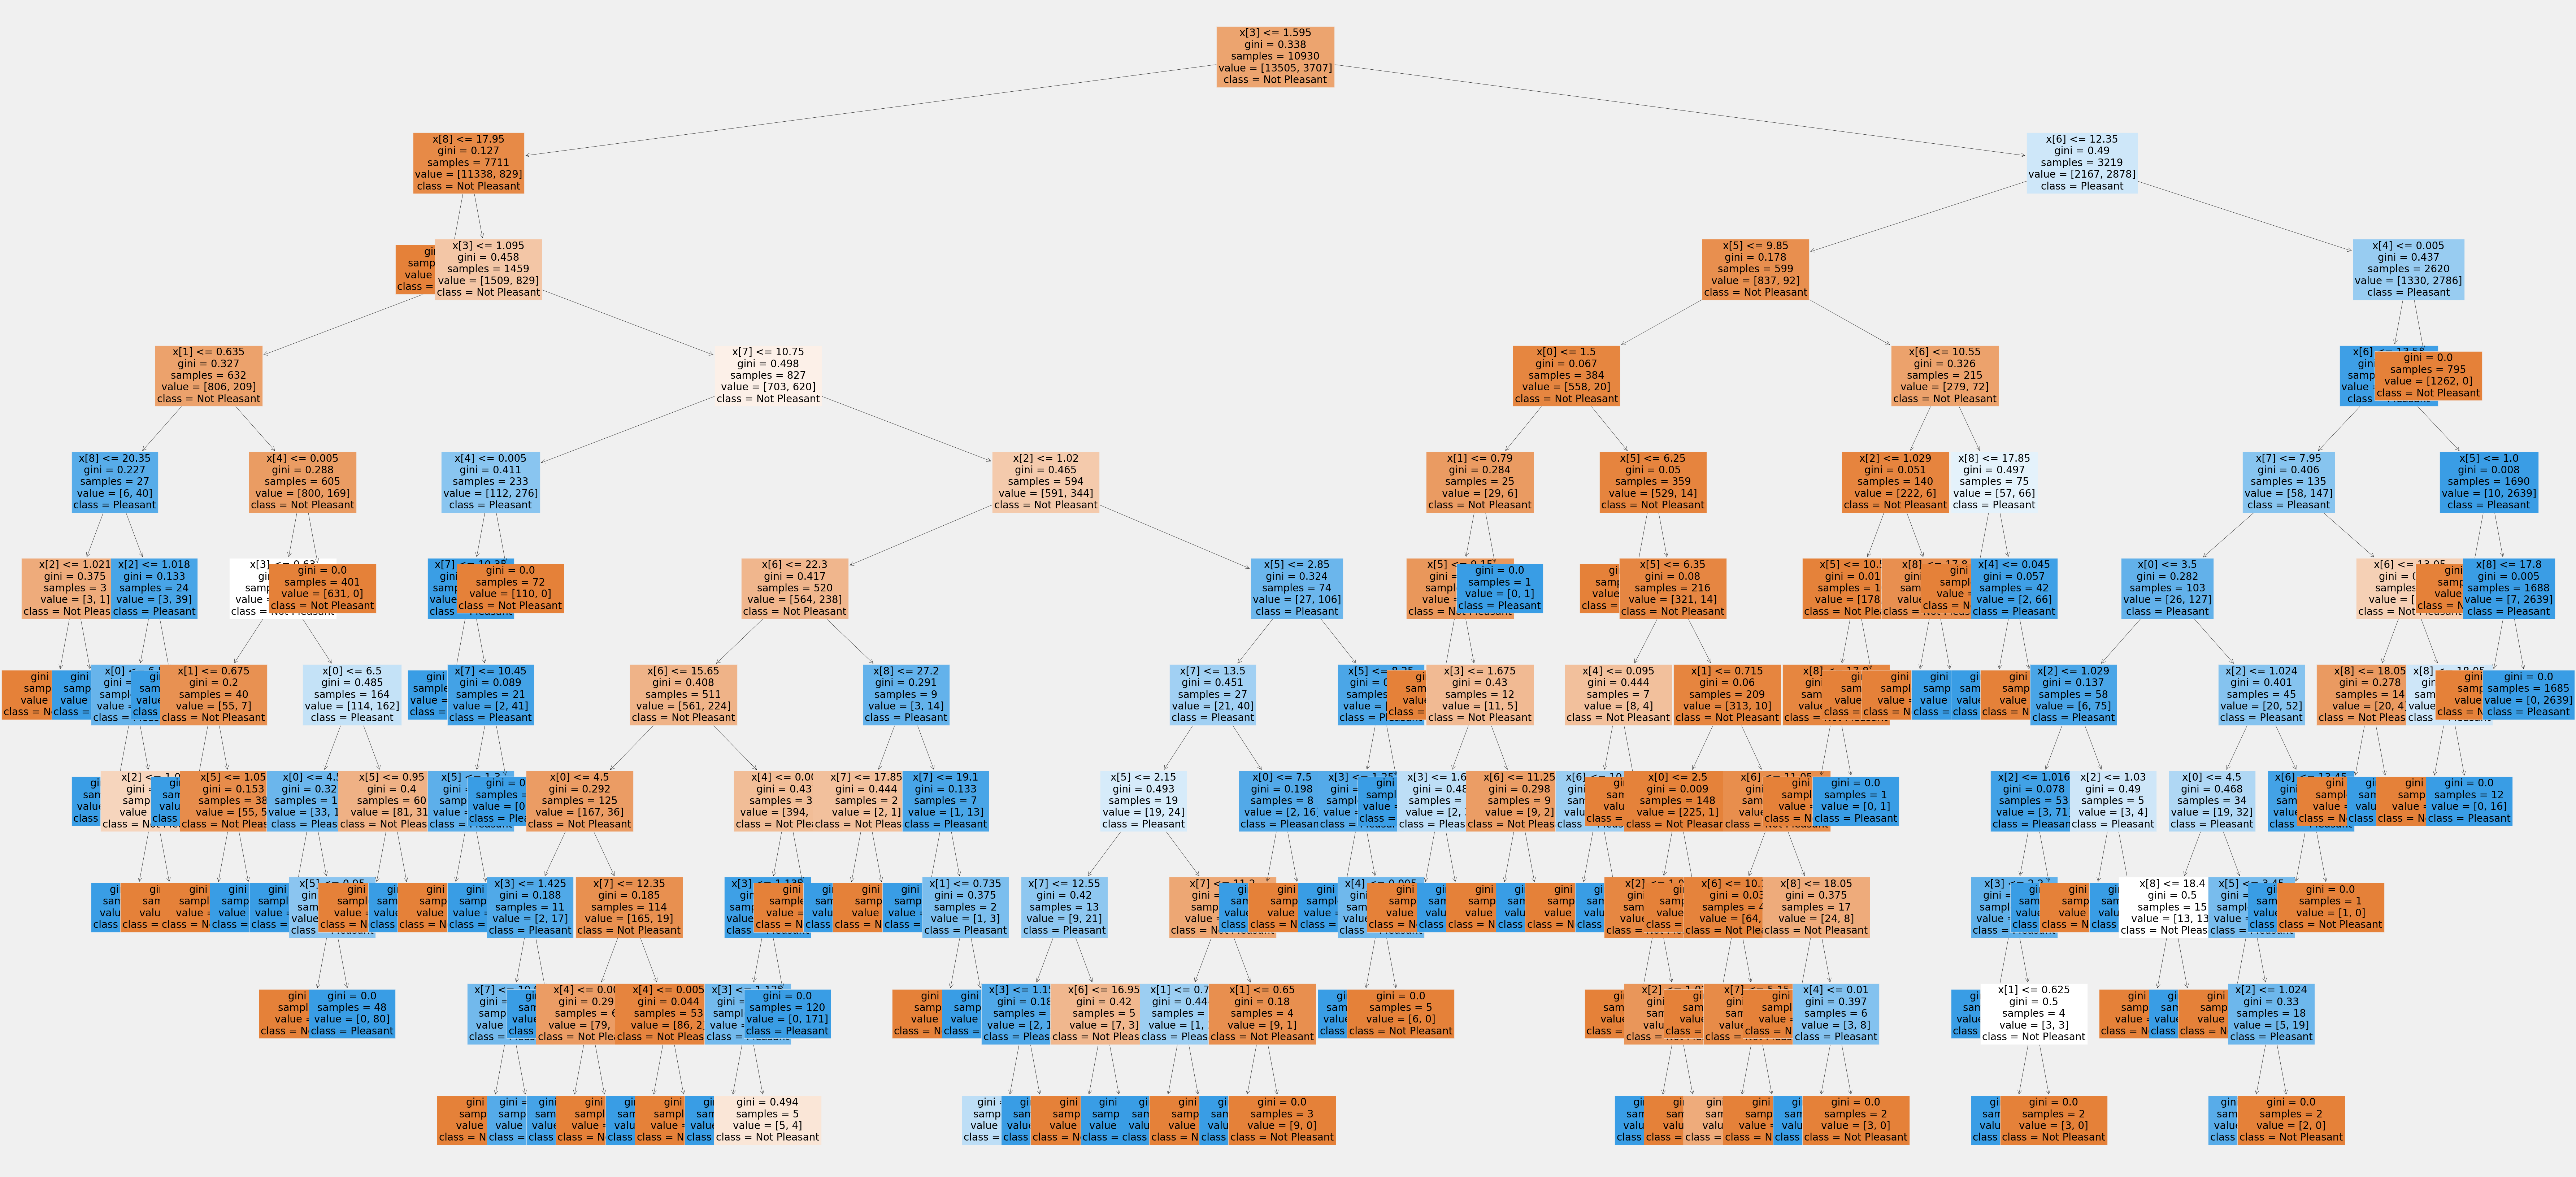

In [140]:
pleasant = {0:'Not Pleasant', 1:'Pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=pleasant, filled=True);

In [142]:
# Get unique values and their counts
values, counts = np.unique(y, return_counts=True)

# Create a dictionary or just print the result
value_counts = dict(zip(values, counts))

print(value_counts)

{0: 18016, 1: 4934}


## 2.4 Importance Chart

In [144]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.0396339 , 0.02167629, 0.01587266, 0.10354546, 0.33213151,
       0.08156204, 0.12252674, 0.01776621, 0.26528518])

In [146]:
newarray = newarray.reshape(-1,1,9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.0396339 , 0.02167629, 0.01587266, 0.10354546, 0.33213151,
         0.08156204, 0.12252674, 0.01776621, 0.26528518]]])

In [148]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.0396339 , 0.02167629, 0.01587266, 0.10354546, 0.33213151,
       0.08156204, 0.12252674, 0.01776621, 0.26528518])

In [150]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"
]

In [152]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.039634
humidity            0.021676
pressure            0.015873
global_radiation    0.103545
precipitation       0.332132
sunshine            0.081562
temp_mean           0.122527
temp_min            0.017766
temp_max            0.265285
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


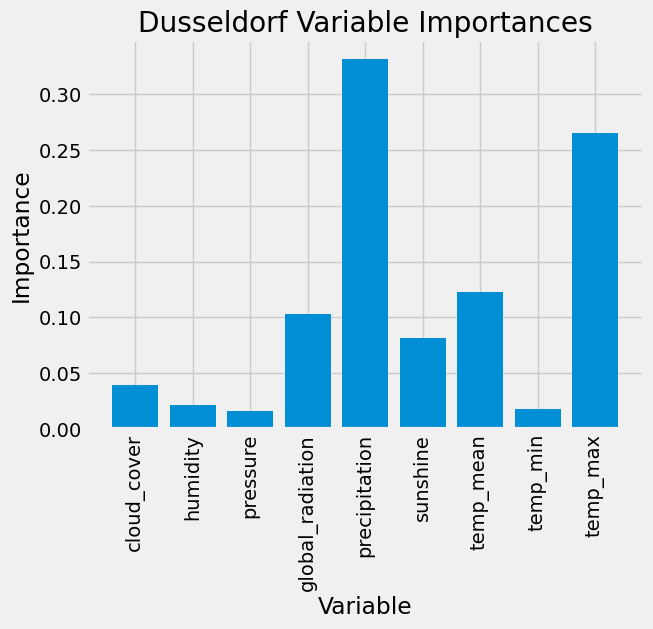

In [154]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Dusseldorf Variable Importances');

## 3. Heathrow

### 3.1 Subsetting

In [156]:
## Create Subset for HEATHROW
dfcHEA = dfc.loc[:, dfc.columns.str.contains('HEATHROW', case=False)]
dfcHEA.head()

HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                     7               0.91             1.0010   
1                     7               0.98             1.0051   
2                     8               0.96             1.0166   
3                     8               0.98             1.0230   
4                     5               0.84             1.0275   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.13                    0.22                0.0   
1                       0.13                    0.23                0.0   
2                       0.15                    0.07                0.1   
3                       0.13                    0.00                0.0   
4                       0.30                    0.00                2.1   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  
0                10.6                9.4                8.3  
1                 6.1                3.9               10.6  
2                 8.4                6.1               12.2  
3                 9.4                6.7                8.9  
4                 8.9                8.9                7.2

In [158]:
dfpHEA = dfp.loc[:, dfp.columns.str.contains('HEATHROW', case=False)]
dfpHEA.head()

HEATHROW_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [160]:
print(dfcHEA.shape,dfpHEA.shape)

(22950, 9) (22950, 1)


In [162]:
X = dfcHEA
y = dfpHEA.HEATHROW_pleasant_weather

### 3.2 Split

In [164]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [166]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### 3.3. Random Forest

In [168]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [170]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


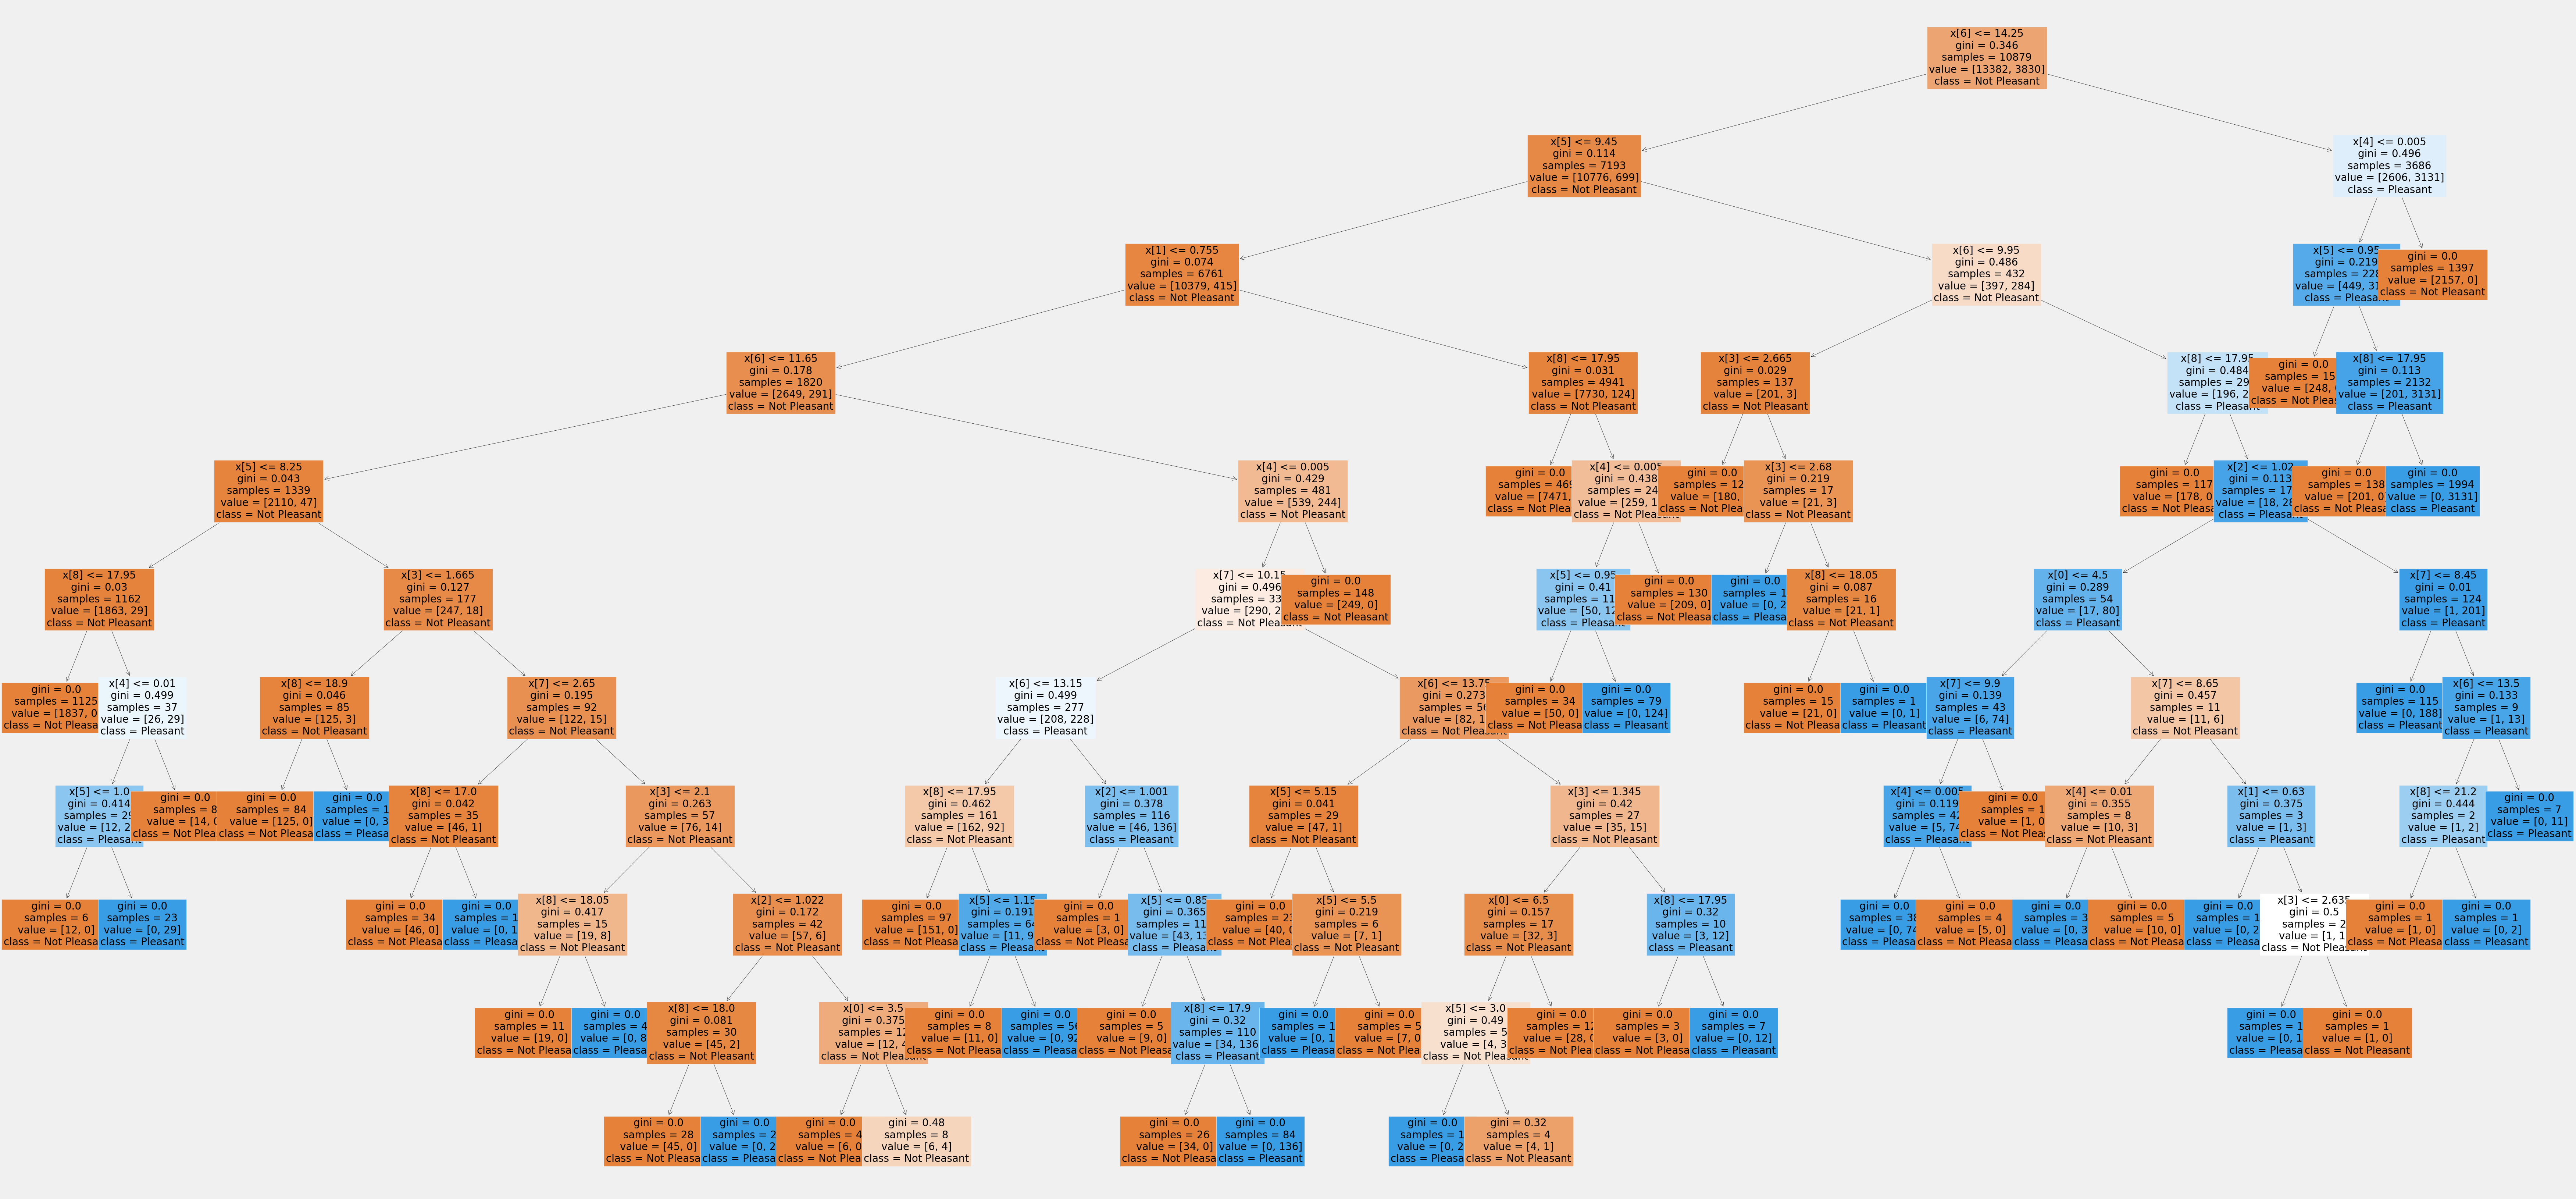

In [172]:
pleasant = {0:'Not Pleasant', 1:'Pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=pleasant, filled=True);

## 3.4 Importance Chart

In [174]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01185163, 0.03278561, 0.01907203, 0.08273306, 0.30363568,
       0.07396652, 0.13304528, 0.01468515, 0.32822504])

In [176]:
newarray = newarray.reshape(-1,1,9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.01185163, 0.03278561, 0.01907203, 0.08273306, 0.30363568,
         0.07396652, 0.13304528, 0.01468515, 0.32822504]]])

In [178]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.01185163, 0.03278561, 0.01907203, 0.08273306, 0.30363568,
       0.07396652, 0.13304528, 0.01468515, 0.32822504])

In [180]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.011852
humidity            0.032786
pressure            0.019072
global_radiation    0.082733
precipitation       0.303636
sunshine            0.073967
temp_mean           0.133045
temp_min            0.014685
temp_max            0.328225
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


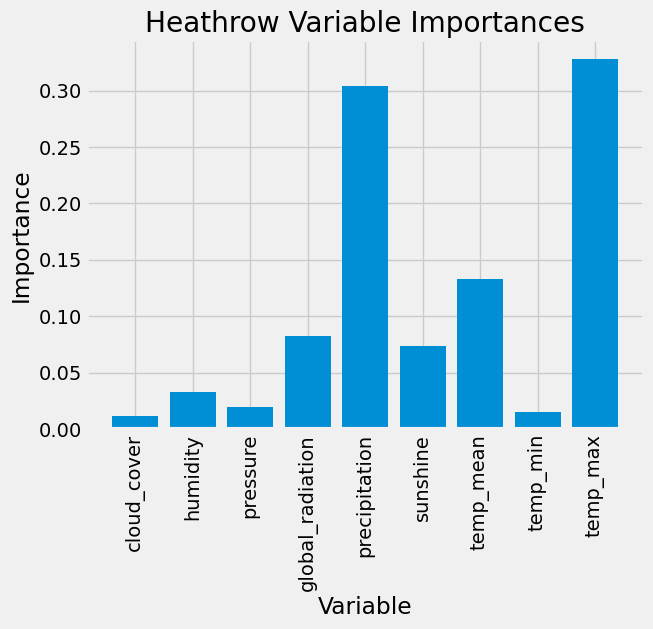

In [184]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Heathrow Variable Importances');

## 4. Maascricht

#### 4.1 Subsetting

In [188]:
## Create Subset for MAASTRICHT
dfcMAA = dfc.loc[:, dfc.columns.str.contains('MAASTRICHT', case=False)]
dfcMAA.head()

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   
1                       8                 0.92               1.0062   
2                       7                 0.97               1.0167   
3                       7                 0.89               1.0277   
4                       7                 0.92               1.0259   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   
1                         0.17                      1.34                  0.4   
2                         0.12                      0.46                  0.0   
3                         0.16                      0.00                  0.3   
4                         0.12                      0.56                  0.0   

   MAASTRICHT_temp_mean  MAASTRICHT_temp_min  MAASTRICHT_temp_max  
0                   9.5                  8.5                 11.1  
1                   8.6                  7.5                  9.9  
2                   6.9                  5.5                  9.9  
3                   7.0                  3.0                 10.0  
4                   8.1                  2.5                 11.1

In [190]:
dfpMAA = dfp.loc[:, dfp.columns.str.contains('MAASTRICHT', case=False)]
dfpMAA.head()

MAASTRICHT_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0

In [192]:
print(dfcMAA.shape,dfpMAA.shape)

(22950, 9) (22950, 1)


In [194]:
X = dfcMAA
y = dfpMAA.MAASTRICHT_pleasant_weather

### 4.2 Split

In [196]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [198]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### 4.3 Random Forest

In [200]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [202]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


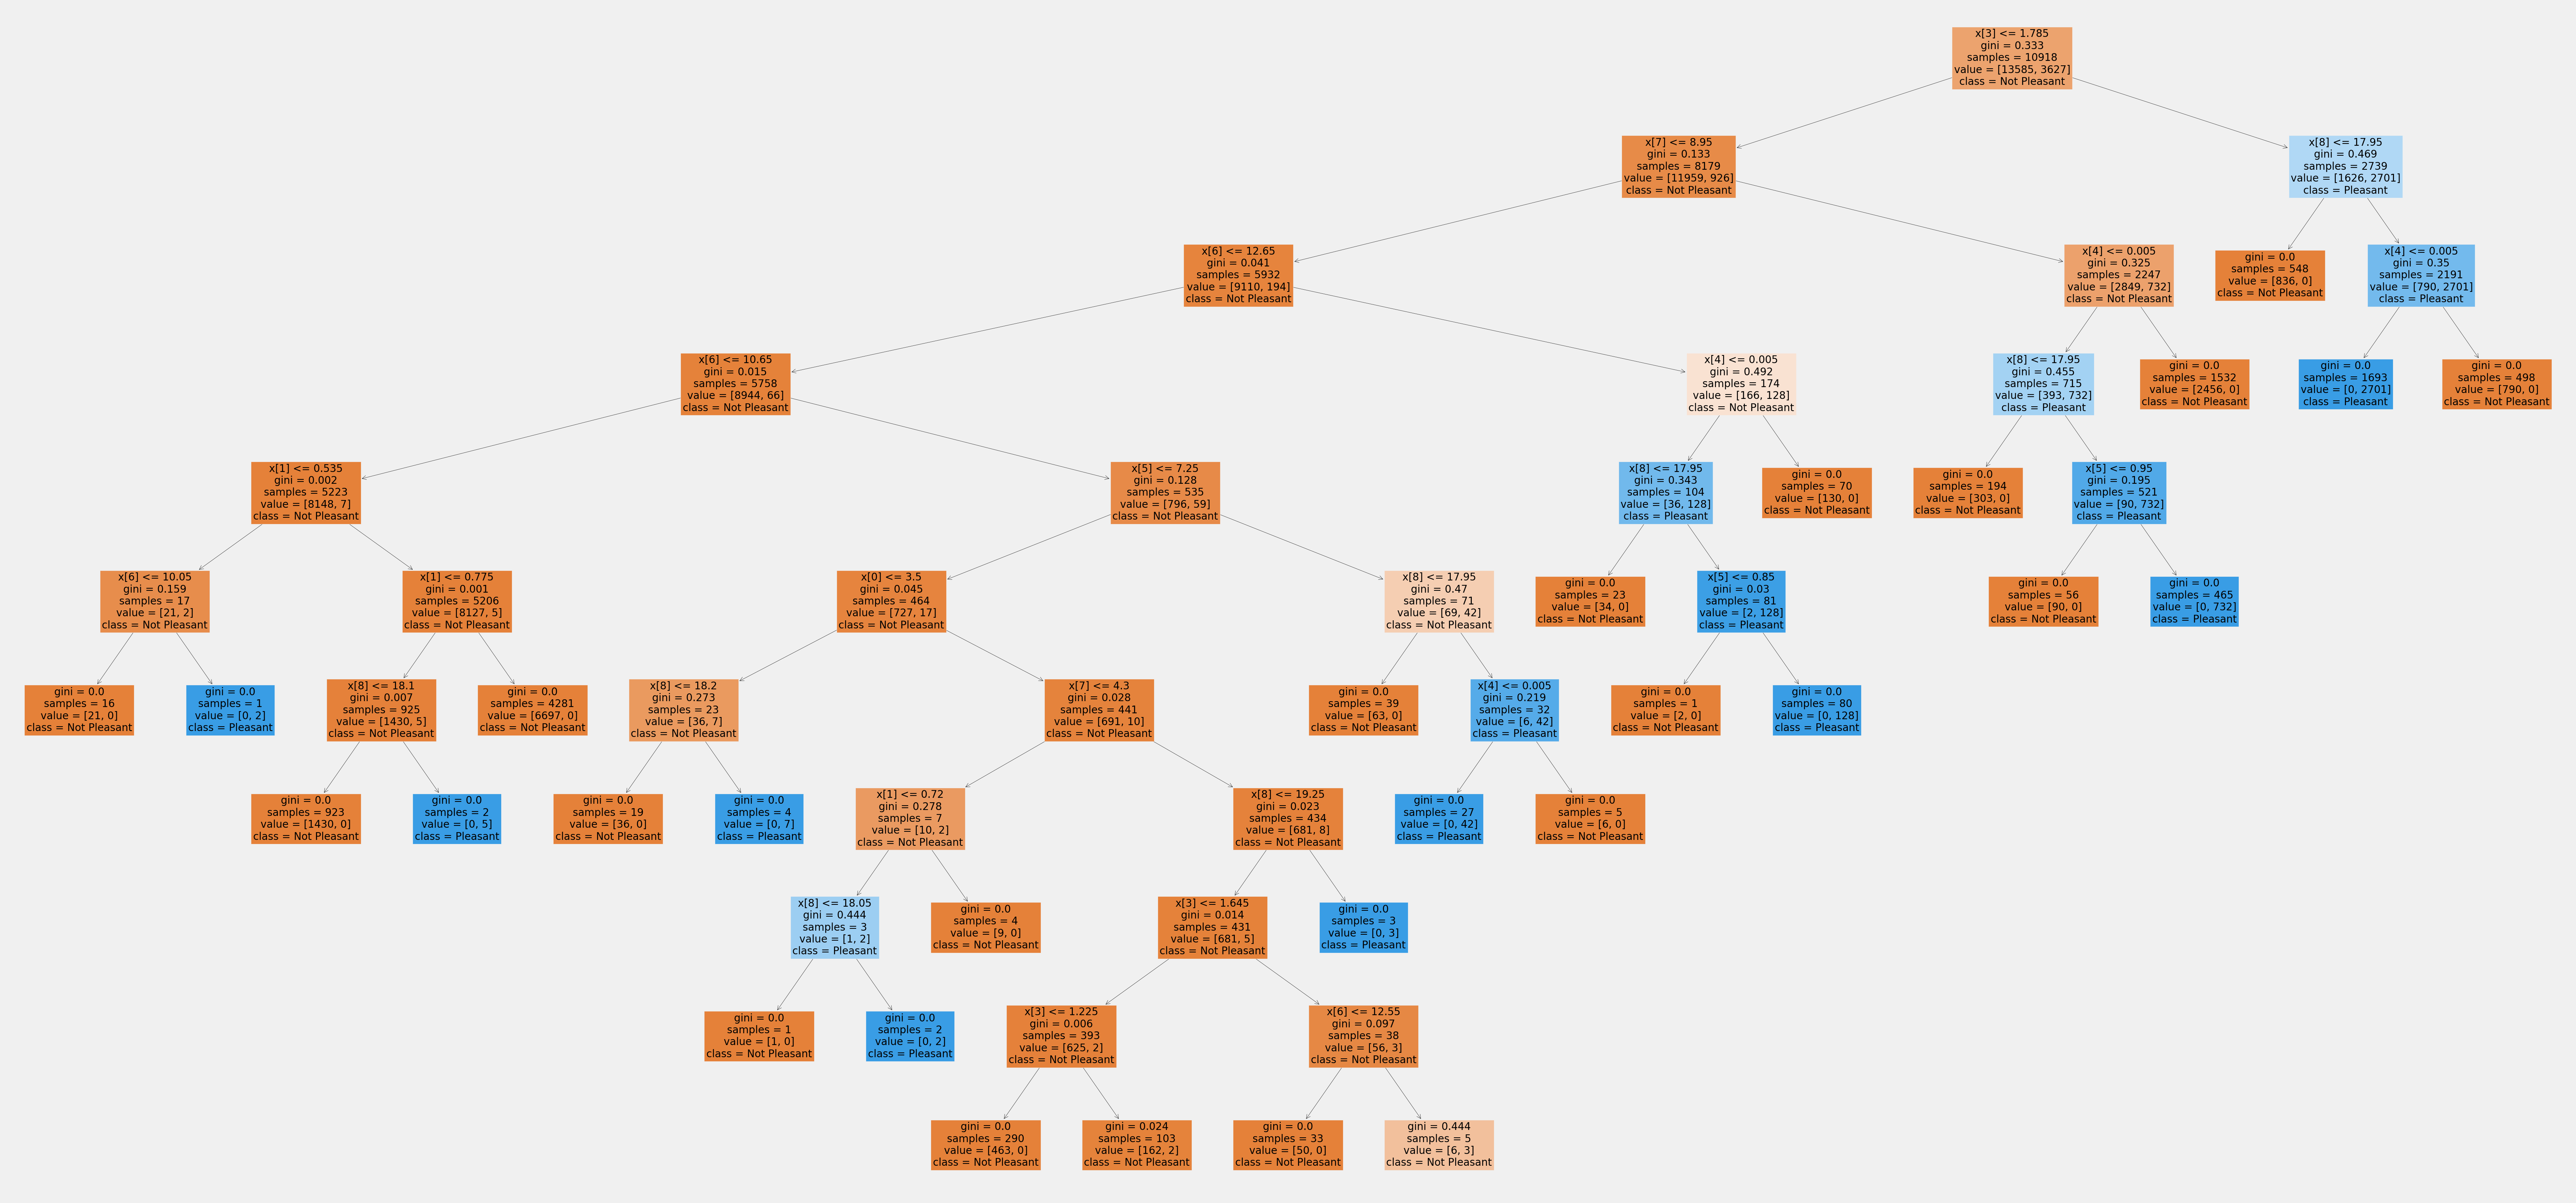

In [204]:
pleasant = {0:'Not Pleasant', 1:'Pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=pleasant, filled=True);

## 4.4 Importance Chart

In [206]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.04478359, 0.02166851, 0.01181714, 0.09099634, 0.31934611,
       0.0642579 , 0.13563622, 0.01659524, 0.29489894])

In [208]:
newarray = newarray.reshape(-1,1,9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.04478359, 0.02166851, 0.01181714, 0.09099634, 0.31934611,
         0.0642579 , 0.13563622, 0.01659524, 0.29489894]]])

In [210]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04478359, 0.02166851, 0.01181714, 0.09099634, 0.31934611,
       0.0642579 , 0.13563622, 0.01659524, 0.29489894])

In [212]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.044784
humidity            0.021669
pressure            0.011817
global_radiation    0.090996
precipitation       0.319346
sunshine            0.064258
temp_mean           0.135636
temp_min            0.016595
temp_max            0.294899
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


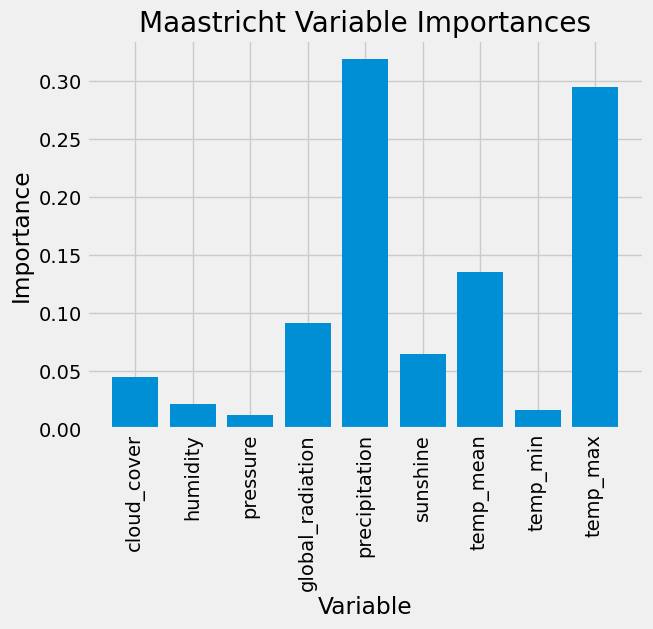

In [214]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Maastricht Variable Importances');